In [2]:
from __future__ import division
import itertools
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import pandas as pd
import math
from sklearn import metrics
from random import randint
from matplotlib import style
import seaborn as sns
%matplotlib inline

In [18]:
colnames = ['date', 'time', 'url_destination', 'unknown_1', 'unknown_2', 'ip_address']
df = pd.read_csv('curriculum-access.txt',
                engine='python',
                header=None,
                index_col=False,
                names=colnames,
                sep=r'\s(?=(?:[^"]*"[^"]*")*[^"]*$)(?![^\[]*\])',
                na_values='"-"',)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 543596 entries, 0 to 543595
Data columns (total 6 columns):
date          543596 non-null object
time          543596 non-null object
url           543595 non-null object
unknown_1     543596 non-null int64
unknown_2     515740 non-null float64
ip_address    543596 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 24.9+ MB


In [11]:
df.describe()

,unknown_1,unknown_2
count,543596.000000,515740.000000
mean,329.354445,32.625877
std,178.595632,12.699356
min,1.000000,1.000000
25%,195.000000,24.000000
50%,344.000000,29.000000
75%,476.000000,34.000000
max,650.000000,57.000000


In [13]:
df.unknown_1.unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

In [16]:
df.groupby('unknown_1').unknown_2.count().sort_values(ascending=False)

unknown_1
11     11065
64     10759
53      9534
1       5437
344     5370
       ...  
357        0
61         0
62         0
63         0
353        0
Name: unknown_2, Length: 650, dtype: int64

In [19]:
df.rename(columns =({'unknown_1': 'user_id'}))

,date,time,url_destination,user_id,unknown_2,ip_address
0,2018-01-26,09:55:03,/,1,8.0,98.106.20.62
1,2018-01-26,09:56:02,java-ii,1,8.0,98.106.20.62
2,2018-01-26,09:56:05,java-ii/object-oriented-programming,1,8.0,98.106.20.62
3,2018-01-26,09:56:06,slides/object_oriented_programming,1,8.0,98.106.20.62
4,2018-01-26,09:56:24,javascript-i/conditionals,2,22.0,98.106.20.62
...,...,...,...,...,...,...
543591,2020-05-15,15:01:40,java-ii/file-io,602,56.0,48.188.241.68
543592,2020-05-15,15:01:54,9-timeseries/3-prep,582,55.0,48.135.163.38
543593,2020-05-15,15:03:37,jquery/ajax/requests-and-responses,637,57.0,71.121.18.17
543594,2020-05-15,15:05:14,10-anomaly-detection/3-discrete-probabilistic-...,11,28.0,77.186.132.227


In [20]:
df.date.min()

'2018-01-26'

In [21]:
df.date.max()

'2020-05-15'

In [22]:
df.unknown_2.describe()

count    515740.000000
mean         32.625877
std          12.699356
min           1.000000
25%          24.000000
50%          29.000000
75%          34.000000
max          57.000000
Name: unknown_2, dtype: float64

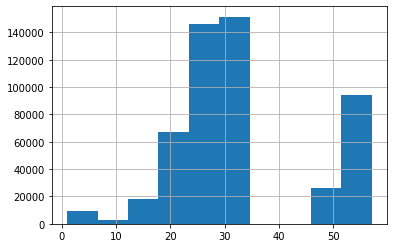

In [23]:
df.unknown_2.hist()

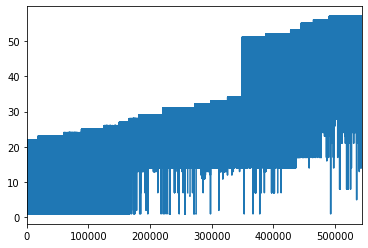

In [24]:
df.unknown_2.plot()

In [26]:
len(df.unknown_2.value_counts())

36

In [32]:
df.unknown_2.unique()

array([ 8., 22., 21.,  1., 16., 18., 19., nan, 13., 14., 15.,  7.,  4.,
       12., 17., 23.,  2.,  9., 11., 24., 25., 26.,  6., 27., 28., 29.,
       31., 32., 33., 34., 51., 52., 53., 55., 56., 57.,  5.])

In [38]:
df['datetime'] = df['date'] + " " + df['time']
df.datetime = pd.to_datetime(df.datetime)
df.set_index('datetime')

,date,time,url_destination,unknown_1,unknown_2,ip_address
datetime,,,,,,
2018-01-26 09:55:03,2018-01-26,09:55:03,/,1,8.0,98.106.20.62
2018-01-26 09:56:02,2018-01-26,09:56:02,java-ii,1,8.0,98.106.20.62
2018-01-26 09:56:05,2018-01-26,09:56:05,java-ii/object-oriented-programming,1,8.0,98.106.20.62
2018-01-26 09:56:06,2018-01-26,09:56:06,slides/object_oriented_programming,1,8.0,98.106.20.62
2018-01-26 09:56:24,2018-01-26,09:56:24,javascript-i/conditionals,2,22.0,98.106.20.62
...,...,...,...,...,...,...
2020-05-15 15:01:40,2020-05-15,15:01:40,java-ii/file-io,602,56.0,48.188.241.68
2020-05-15 15:01:54,2020-05-15,15:01:54,9-timeseries/3-prep,582,55.0,48.135.163.38
2020-05-15 15:03:37,2020-05-15,15:03:37,jquery/ajax/requests-and-responses,637,57.0,71.121.18.17


In [123]:
# unknown2 is more likely cohort than anything else
df = df.rename(columns = {'unknown_1': 'user_id', 'unknown_2': 'cohort'})

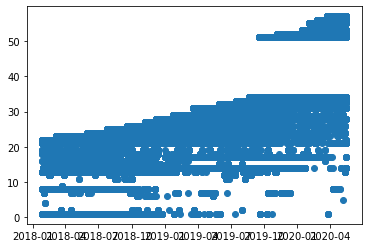

In [40]:
plt.scatter(x=df.datetime, y=df.unknown_2)

In [43]:
df.groupby('unknown_2').unknown_1.sum()

unknown_2
1.0       744393
2.0        25412
4.0          340
5.0          649
6.0        21962
7.0        67755
8.0        35867
9.0          760
11.0       55714
12.0       30625
13.0      208524
14.0      553309
15.0       76565
16.0       53337
17.0     1440419
18.0      167054
19.0      140560
21.0      448163
22.0     1207874
23.0     3724979
24.0     6933548
25.0     5908709
26.0     7532005
27.0     6075296
28.0     6648499
29.0    12263404
31.0     9453780
32.0    11624226
33.0    17354796
34.0    11230020
51.0    13183893
52.0    13856591
53.0    16237299
55.0     8332803
56.0     8738747
57.0     6047976
Name: unknown_1, dtype: int64

In [47]:
df[df.url_destination == '10-anomaly-detection/1-overview']['unknown_2'].value_counts()

34.0    371
28.0    348
55.0     88
22.0      2
51.0      1
14.0      1
32.0      1
Name: unknown_2, dtype: int64

In [55]:
df.groupby('unknown_2').unknown_1.unique()

unknown_2
1.0     [11, 60, 64, 95, 141, 146, 148, 170, 209, 211,...
2.0                                       [144, 280, 396]
4.0                                                  [85]
5.0                                                 [649]
6.0                                            [283, 405]
7.0                          [77, 169, 173, 88, 348, 513]
8.0                               [1, 114, 150, 174, 646]
9.0                                                 [152]
11.0                             [177, 245, 88, 279, 463]
12.0                                  [101, 161, 214, 88]
13.0        [50, 51, 66, 68, 93, 113, 156, 167, 118, 318]
14.0    [53, 69, 80, 82, 90, 98, 139, 147, 149, 246, 5...
15.0                             [72, 107, 164, 172, 427]
16.0                [21, 40, 97, 143, 165, 181, 216, 322]
17.0    [102, 106, 140, 151, 168, 210, 241, 242, 281, ...
18.0    [26, 67, 76, 81, 83, 84, 91, 104, 108, 162, 17...
19.0    [37, 70, 71, 75, 87, 92, 94, 96, 105, 109, 112...
21.0

In [100]:

df_2 = pd.DataFrame(df.groupby('unknown_2').unknown_1.unique())
df_2.index

Float64Index([ 1.0,  2.0,  4.0,  5.0,  6.0,  7.0,  8.0,  9.0, 11.0, 12.0, 13.0,
              14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 21.0, 22.0, 23.0, 24.0, 25.0,
              26.0, 27.0, 28.0, 29.0, 31.0, 32.0, 33.0, 34.0, 51.0, 52.0, 53.0,
              55.0, 56.0, 57.0],
             dtype='float64', name='unknown_2')

In [105]:
x = 0
for i in df_2.index:
    x += len(df_2.unknown_1[i])
x

628

In [115]:
pd.DataFrame(df.url_destination.value_counts())

,url_destination
/,28920
javascript-i,10950
search/search_index.json,10859
toc,9839
html-css,8202
...,...
content/mysql/relationships/indexes.html,1
8.0_Intro_Module,1
10.02.04_EntityLabeling.md,1
console-io,1


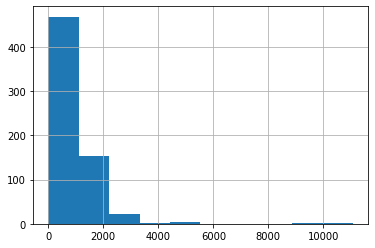

In [122]:
df.groupby('user_id').ip_address.count().hist()

In [130]:
df[df.user_id == 429]

,date,time,url_destination,user_id,group,ip_address,datetime
282106,2019-06-12,12:48:26,/,429,NaN,98.106.20.59,2019-06-12 12:48:26
282107,2019-06-12,12:48:29,open_data,429,NaN,98.106.20.59,2019-06-12 12:48:29
282108,2019-06-12,12:48:30,Intro_to_Regression_Module,429,NaN,98.106.20.59,2019-06-12 12:48:30
282109,2019-06-12,12:48:36,open_data,429,NaN,98.106.20.59,2019-06-12 12:48:36
283444,2019-06-14,10:34:43,/,429,NaN,98.106.20.59,2019-06-14 10:34:43
...,...,...,...,...,...,...,...
538054,2020-05-09,10:21:39,6-regression/1-overview,429,NaN,69.202.220.224,2020-05-09 10:21:39
538055,2020-05-09,10:21:40,3-sql/1-mysql-overview,429,NaN,69.202.220.224,2020-05-09 10:21:40
538056,2020-05-09,10:21:42,5-stats/1-overview,429,NaN,69.202.220.224,2020-05-09 10:21:42
538057,2020-05-09,10:21:46,5-stats/2-simulation,429,NaN,69.202.220.224,2020-05-09 10:21:46


In [144]:
df.group.count_uniques()

AttributeError: 'Series' object has no attribute 'count_uniques'

Can you label students who are viewing both the web dev and data science curriculum? Can you label students by the program they are in? Can you label users by student vs. staff? What are Zach, Maggie, David, and Ryan's ids? Can you label students who are viewing both the web dev and data science curriculum? Can you label students by the program they are in? Can you label users by student vs. staff?
